# Clustering Begins From Here

In [84]:
# https://www.youtube.com/watch?v=4b5d3muPQmA

In [85]:
# Importing the pandas libraries

import pandas as pd


In [86]:
# Importing the files

dfile = pd.read_csv("Mall_Customers.csv")
dfile.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [87]:
# Renaming the columns
dfile.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [88]:
# Rename
dfile = dfile.rename(columns={
    "Annual Income (k$)": 'Annua_Income',
    'Spending Score (1-100)': "Spend_Score"
})

In [89]:
dfile.head()

,CustomerID,Gender,Age,Annua_Income,Spend_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [90]:
# Splitting the features

x = dfile[['Annua_Income', 'Spend_Score']]
x.head()

,Annua_Income,Spend_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [91]:
# 

In [92]:
# Scaling the data values

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

xscaled = scaler.fit_transform(x)

xscaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [93]:
# Converting the np array into dataframe

x_new = pd.DataFrame(xscaled, columns =  x.columns)
x_new.head()

,Annua_Income,Spend_Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [94]:
# Fitting the model

from sklearn.cluster import KMeans


dmodel = KMeans(n_clusters = 5)
dmodel.fit(x_new)


,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [95]:
# Getting  the labels value

klabels = dmodel.labels_
klabels

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [96]:
# Accessing the centers
centers = dmodel.cluster_centers_
centers

array([[-0.2088822 , -0.01892551],
       [-1.30751869, -1.13696536],
       [ 1.03782678, -1.26622991],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788]])

In [97]:
# Converting it in data frame

centers_df = pd.DataFrame(centers, columns = ['x', 'y'] )

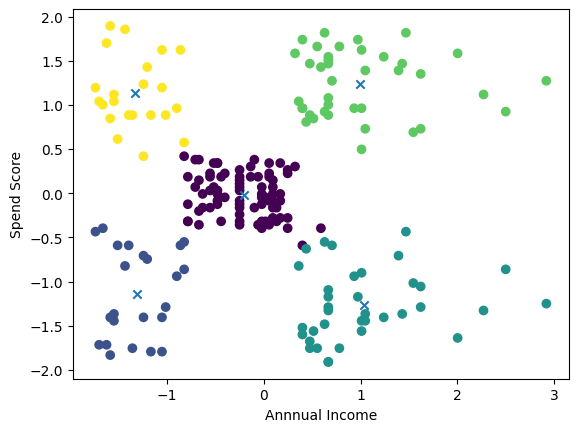

In [98]:
# Showing this in clusterized format
import matplotlib.pyplot as plt

plt.scatter(x_new.Annua_Income, x_new.Spend_Score ,c= klabels)
plt.scatter(centers_df.x, centers_df.y, marker ="x")
plt.xlabel("Annnual Income")
plt.ylabel("Spend Score")
plt.show()

In [99]:
# WCSS [WIthhin Cluster sum of squares]


wcss = []

for i in range(2,11):
    km = KMeans(n_clusters= i, random_state= 5)
    km.fit(xscaled)

    inertia = km.inertia_

    wcss.append(inertia)



In [100]:
wcss

[270.70426664306717,
 157.7040081503594,
 108.92131661364358,
 65.57885579985049,
 57.36946580413151,
 49.53989243010954,
 37.740492189065435,
 32.91645050982751,
 29.73600445507526]